# Disturbance year

In [8]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
import sys
from geo_tools import disturbance_year_barplot, plot_iso_forest

# Reloads module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Output directory

In [5]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [6]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [7]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution

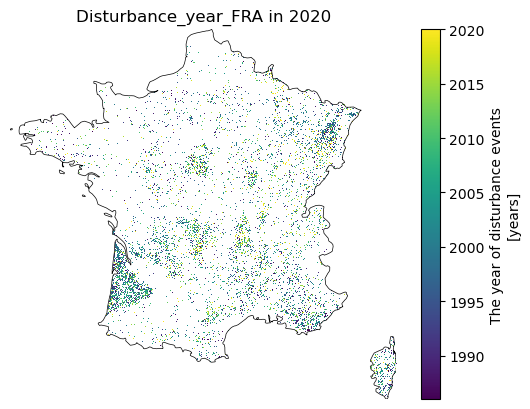

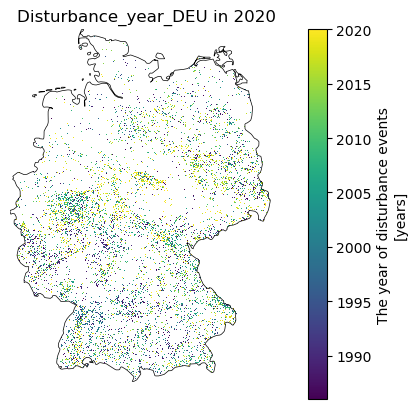

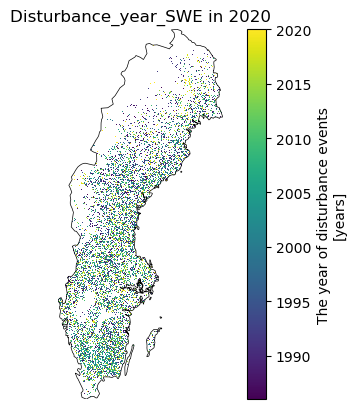

In [9]:
# To be changed into yearly distribution

# Testing plot_iso_forest for many countries at once
for iso in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest(
        iso_code=iso,
        xarray_id="Disturbance_year"
    )

# Calculating percentage of forest cover affected by disturbance

In [17]:
%%time

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv")

# Template to store country results in Mha
disturbance_mha = []

# Template to store country results in percentage share
disturbance_perc = []

for iso in eu_iso:

    # Calculate area in Mha
    iso_disturbance = disturbance_year_barplot.yearly_disturbance(
        iso_code=iso,
        xarray_id="Disturbance_year"
    )
    disturbance_mha.append(iso_disturbance)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_disturbance
    iso_disturbance[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_disturbance["Percentage share"] = iso_disturbance["Value"] / iso_disturbance[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_disturbance_perc = iso_disturbance.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_disturbance_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_disturbance_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )

    # Percentage share for all countries
    disturbance_perc.append(iso_disturbance_perc)

disturbance_year_df = pd.concat(disturbance_perc)

CPU times: user 2min 24s, sys: 40.1 s, total: 3min 4s
Wall time: 9min 7s


In [18]:
disturbance_year_df[disturbance_year_df.Region=="DEU"].head()

,Region,Variable,Year,Unit,Value
0,DEU,Disturbance Year,1986,Percentage share,0.012499
1,DEU,Disturbance Year,1987,Percentage share,0.005934
2,DEU,Disturbance Year,1988,Percentage share,0.007472
3,DEU,Disturbance Year,1989,Percentage share,0.009352
4,DEU,Disturbance Year,1990,Percentage share,0.031067


# Exporting the processed dataset

In [19]:
disturbance_year_df.to_csv(output_data_dir/"iso_disturbance_year.csv")